# **Facial Expression Recognition**

# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model
import matplotlib.image as mpimg
import random
from keras.layers import Input, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.applications import VGG16, VGG19
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

# Préparation des données

## Importation de la base de données (Version Google Collab)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

test_file_name = "/content/drive/MyDrive/FER2013.zip"

with ZipFile(test_file_name, 'r') as zip:
    zip.printdir()
    zip.extractall('FER') 


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
FER2013/train/angry/Training_81541574.jpg      2020-07-19 13:26:16         1381
__MACOSX/FER2013/train/angry/._Training_81541574.jpg 2020-07-19 13:26:16          212
FER2013/train/angry/Training_50120123.jpg      2020-07-19 13:26:16         1584
__MACOSX/FER2013/train/angry/._Training_50120123.jpg 2020-07-19 13:26:16          212
FER2013/train/angry/Training_60016886.jpg      2020-07-19 13:26:16         1655
__MACOSX/FER2013/train/angry/._Training_60016886.jpg 2020-07-19 13:26:16          212
FER2013/train/angry/Training_68690730.jpg      2020-07-19 13:26:16         1761
__MACOSX/FER2013/train/angry/._Training_68690730.jpg 2020-07-19 13:26:16          212
FER2013/train/angry/Training_73515932.jpg      2020-07-19 13:26:16         1446
__MACOSX/FER2013/train/angry/._Training_73515932.jpg 2020-07-19 13:26:16          212
FER2013/train/angry/Training_32153813.jpg      2020-07-19 13:26:16         1557
__MACOSX/FER

In [4]:
# Répertoire où on stocke notre dataset
base_dir = '/content/FER/FER2013'

# Répertoires pour le training et le test 
train_dir = '/content/FER/FER2013/train'
train_angry_dir = '/content/FER/FER2013/train/angry'
train_disgust_dir = '/content/FER/FER2013/train/disgust'
train_fear_dir = '/content/FER/FER2013/train/fear'
train_happy_dir = '/content/FER/FER2013/train/happy'
train_neutral_dir = '/content/FER/FER2013/train/neutral'
train_sad_dir = '/content/FER/FER2013/train/sad'
train_surprise_dir = '/content/FER/FER2013/train/surprise'

test_dir = '/content/FER/FER2013/test'
test_angry_dir = '/content/FER/FER2013/test/angry'
test_disgust_dir = '/content/FER/FER2013/test/disgust'
test_fear_dir = '/content/FER/FER2013/test/fear'
test_happy_dir = '/content/FER/FER2013/test/happy'
test_neutral_dir = '/content/FER/FER2013/test/neutral'
test_sad_dir = '/content/FER/FER2013/test/sad'
test_surprise_dir = '/content/FER/FER2013/test/surprise'

## Importation de la base de données (Version Local)

In [ ]:
# Répertoire où on stocke notre dataset
base_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER'

# Répertoires pour le training et le test 
train_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train'
train_angry_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/angry'
train_disgust_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/disgust'
train_fear_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/fear'
train_happy_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/happy'
train_neutral_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/neutral'
train_sad_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/sad'
train_surprise_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/train/surprise'

test_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test'
test_angry_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/angry'
test_disgust_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/disgust'
test_fear_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/fear'
test_happy_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/happy'
test_neutral_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/neutral'
test_sad_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/sad'
test_surprise_dir = '/Users/Ombeline/Documents/IMT/M1/5 - MDATA/Projet_FER/FER/test/surprise'

In [ ]:
print ("La taille totale de la base de données est de : ", len(os.listdir(train_angry_dir)) + len(os.listdir(train_disgust_dir)) + len(os.listdir(train_fear_dir)) + len(os.listdir(train_happy_dir)) + len(os.listdir(train_neutral_dir)) +  len(os.listdir(train_sad_dir)) + len(os.listdir(train_surprise_dir)) + len(os.listdir(test_angry_dir)) + len(os.listdir(test_disgust_dir)) + len(os.listdir(test_fear_dir)) +  len(os.listdir(test_happy_dir)) +len(os.listdir(test_neutral_dir)) + len(os.listdir(test_sad_dir)) + len(os.listdir(test_surprise_dir))  )

La taille totale de la base de données est de :  35887


## Visualisation de la distribution des 7 expressions dans la base d'aprentisssage

In [ ]:
print('total training angry images:', len(os.listdir(train_angry_dir)))
print('total training disgust images:', len(os.listdir(train_disgust_dir)))
print('total training fear images:', len(os.listdir(train_fear_dir)))
print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training neutral images:', len(os.listdir(train_neutral_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))
print('total training surprise images:', len(os.listdir(train_surprise_dir)))

total training angry images: 3995
total training disgust images: 436
total training fear images: 4097
total training happy images: 7215
total training neutral images: 4965
total training sad images: 4830
total training surprise images: 3171


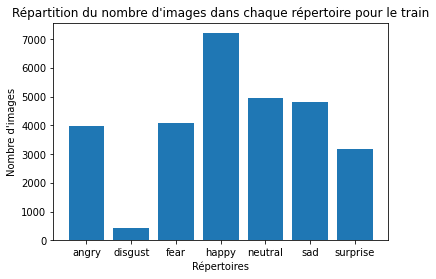

In [ ]:
# Créer une liste des noms de répertoires
directories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Fonction pour compter le nombre de fichiers dans chaque répertoire
def count_files(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Créer une liste de nombres de fichiers pour chaque répertoire
train_counts = [count_files(os.path.join(train_dir, d)) for d in directories]

# Créer un graphique en barres pour afficher les nombres de fichiers pour le train
plt.bar(directories, train_counts)
plt.xlabel('Répertoires')
plt.ylabel('Nombre d\'images')
plt.title('Répartition du nombre d\'images dans chaque répertoire pour le train')
plt.show()

On observe qu'il y a très peu d'images d'entraînement de la classe "disgust", notre réseau de neurones aura donc plus de difficulté à déterminer cet état.

## Visualisation de la distribution des 7 expressions dans la base test

In [ ]:
print('total test angry images:', len(os.listdir(test_angry_dir)))
print('total test disgust images:', len(os.listdir(test_disgust_dir)))
print('total test fear images:', len(os.listdir(test_fear_dir)))
print('total test happy images:', len(os.listdir(test_happy_dir)))
print('total test neutral images:', len(os.listdir(test_neutral_dir)))
print('total test sad images:', len(os.listdir(test_sad_dir)))
print('total test surprise images:', len(os.listdir(test_surprise_dir)))

total test angry images: 958
total test disgust images: 111
total test fear images: 1024
total test happy images: 1774
total test neutral images: 1233
total test sad images: 1247
total test surprise images: 831


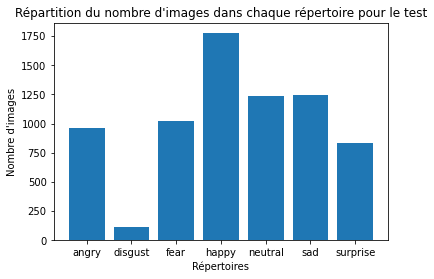

In [ ]:
# Créer une liste de nombres de fichiers pour chaque répertoire
test_counts = [count_files(os.path.join(test_dir, d)) for d in directories]

# Créer un graphique en barres pour afficher les nombres de fichiers pour le test
plt.bar(directories, test_counts)
plt.xlabel('Répertoires')
plt.ylabel('Nombre d\'images')
plt.title('Répartition du nombre d\'images dans chaque répertoire pour le test')
plt.show()

On observe qu'il y a très peu d'images de test de la classe "disgust" une fois de plus.

## Affichage des exemples d'images de la base d'apprentissage

In [ ]:
def plot_images_from_directories(n=10):
    # Get the list of all images in each directory
    image_files = []
    directories = [train_angry_dir, train_disgust_dir, train_fear_dir, train_happy_dir, train_neutral_dir, train_sad_dir, train_surprise_dir]
    for directory in directories :
        image_files.append(os.listdir(directory))
    
    # Display a few example images
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Choose a random directory and a random image from that directory
        random_directory_idx = random.randint(0, 6)
        random_image_idx = random.randint(0, len(image_files[random_directory_idx]) - 1)
        image_path = os.path.join(directories[random_directory_idx], image_files[random_directory_idx][random_image_idx])
        
        # Load and display the image
        img = mpimg.imread(image_path)
        ax = plt.subplot(1, n, i+1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(img)
    plt.show()

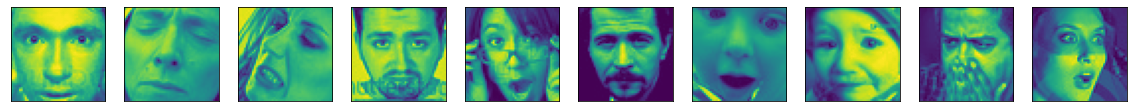

In [ ]:
plot_images_from_directories()

# **Essai 1 : CNN Simple**

## Pré-traitement des données

In [ ]:
# Redimensionne les images en x 1/255
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# On a 28 709 images de train
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=256, 
        class_mode='categorical' 
)

# On a 7178 images de test
validation_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=256, 
        class_mode='categorical') 

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 150, 150, 3)
labels batch shape: (256, 7)


## Affichage de l'indice des 7 classes

In [ ]:
labels = (train_generator.class_indices)
print (labels)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
print(labels_batch[1])

[0. 0. 0. 0. 0. 0. 1.]


Par exemple, cette image fait partie de la classe 'surprise' car elle possède un '1' à l'indice 6.

## Création du modèle de réseau CNN

In [ ]:
model = Sequential ()
model.add (Conv2D (filters =32 , kernel_size =(3, 3) , activation = 'relu', input_shape =(150 , 150 , 3) ))
model.add (MaxPooling2D ((2 , 2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add (Flatten () )
model.add (Dense (units =512 , activation = 'relu'))
model.add (Dense (units =7 , activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

## Définition du modèle d'apprentissage

In [ ]:
history = model.fit(train_generator, steps_per_epoch=113, epochs=75, validation_data=validation_generator, validation_steps=29)

Epoch 1/75
113/113 [==============================] - 40s 351ms/step - loss: 1.8159 - accuracy: 0.2511 - val_loss: 1.8018 - val_accuracy: 0.2502
Epoch 2/75
113/113 [==============================] - 40s 354ms/step - loss: 1.7788 - accuracy: 0.2641 - val_loss: 1.7549 - val_accuracy: 0.2832
Epoch 3/75
113/113 [==============================] - 39s 346ms/step - loss: 1.7313 - accuracy: 0.3096 - val_loss: 1.7139 - val_accuracy: 0.2994
Epoch 4/75
113/113 [==============================] - 42s 370ms/step - loss: 1.6846 - accuracy: 0.3491 - val_loss: 1.6589 - val_accuracy: 0.3663
Epoch 5/75
113/113 [==============================] - 42s 371ms/step - loss: 1.6432 - accuracy: 0.3695 - val_loss: 1.6285 - val_accuracy: 0.3920
Epoch 6/75
113/113 [==============================] - 39s 344ms/step - loss: 1.6122 - accuracy: 0.3863 - val_loss: 1.6013 - val_accuracy: 0.3930
Epoch 7/75
113/113 [==============================] - 41s 366ms/step - loss: 1.5892 - accuracy: 0.3973 - val_loss: 1.5857 - val_ac

In [ ]:
# Enregistement du modèle pour l'utiliser après avoir deconnecté
model.save('facial-expression-recognition_1_v3.h5')

## Visualisation de l'évolution de l'apprentissage (fonction coût et accuracy)

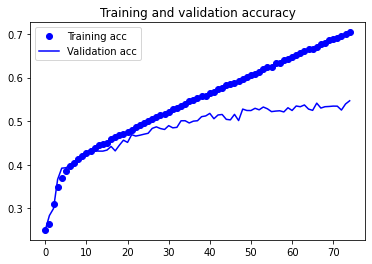

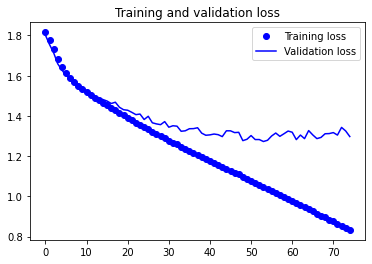

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification sur le set Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical',
        shuffle=False)

Found 7178 images belonging to 7 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=29)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

29/29 [==============================] - 7s 232ms/step - loss: 1.2975 - accuracy: 0.5468
Accuracy score du jeu de données test : 54.68%


## Visualisation de la matrice de confusion

In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

29/29 [==============================] - 8s 280ms/step


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

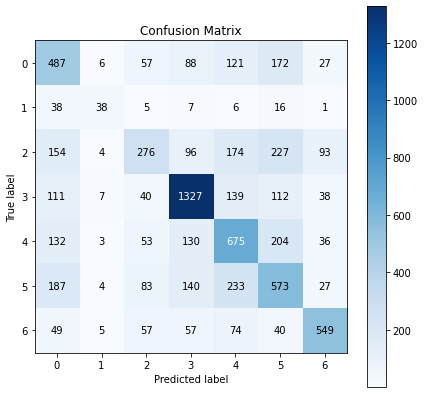

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred_classes, figsize=(7,7))

# **Essai 2 : Augmentation de données** 

## Pré-traitement des données avec l'augmentation de données

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40, # valeur en degrés (0-180), plage à l'intérieur de laquelle on peut faire tourner les images de maniere random
      width_shift_range=0.2, # plage (en fraction de la largeur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images horizontalement.
      height_shift_range=0.2, # plage (en fraction de la hauteur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images verticalement.
      shear_range=0.2, # plage permettant d'appliquer de manière aléatoire des transformations de cisaillement
      zoom_range=0.2, # zoomer de manière aléatoire à l'intérieur des images
      horizontal_flip=True, # retourner de manière aléatoire la moitié des images horizontalement -- pertinent lorsqu'il n'y a pas d'hypothèse d'asymétrie horizontale
      fill_mode='nearest') # stratégie utilisée pour remplir les pixels nouvellement créés

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=256, 
        class_mode='categorical' 
)

validation_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=256, 
        class_mode='categorical') 

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Création du modèle de réseau CNN

In [ ]:
model = Sequential ()
model.add (Conv2D (filters =32 , kernel_size =(3, 3) , activation = 'relu', input_shape =(150 , 150 , 3) ))
model.add (MaxPooling2D ((2 , 2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add (Flatten () )
model.add (Dense (units =512 , activation = 'relu'))
model.add (Dense (units =7 , activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

## Définition du modèle d'apprentissage

In [ ]:
history = model.fit(train_generator, steps_per_epoch=113, epochs=100, validation_data=validation_generator, validation_steps=29)

Epoch 1/100
113/113 [==============================] - 184s 2s/step - loss: 1.8250 - accuracy: 0.2498 - val_loss: 1.8130 - val_accuracy: 0.2471
Epoch 2/100
113/113 [==============================] - 168s 1s/step - loss: 1.8094 - accuracy: 0.2519 - val_loss: 1.8014 - val_accuracy: 0.2544
Epoch 3/100
113/113 [==============================] - 167s 1s/step - loss: 1.8002 - accuracy: 0.2554 - val_loss: 1.7912 - val_accuracy: 0.2572
Epoch 4/100
113/113 [==============================] - 168s 1s/step - loss: 1.7943 - accuracy: 0.2575 - val_loss: 1.7812 - val_accuracy: 0.2742
Epoch 5/100
113/113 [==============================] - 167s 1s/step - loss: 1.7898 - accuracy: 0.2589 - val_loss: 1.7720 - val_accuracy: 0.2639
Epoch 6/100
113/113 [==============================] - 168s 1s/step - loss: 1.7848 - accuracy: 0.2615 - val_loss: 1.7649 - val_accuracy: 0.2712
Epoch 7/100
113/113 [==============================] - 169s 1s/step - loss: 1.7818 - accuracy: 0.2610 - val_loss: 1.7595 - val_accuracy:

In [ ]:
# Enregistement du modèle pour l'utiliser après avoir deconnecté
model.save('facial-expression-recognition_2_v3.h5')

## Visualisation de l'évolution de l'apprentissage (fonction coût et accuracy)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification sur le set Test

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical',
        shuffle =False)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=29)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

## Visualisation de la matrice de confusion

In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred_classes, figsize=(7,7))

# **Essai 3 : Utilisation de VGG**

## Pré-traitement des données 

In [5]:
# Redimensionne les images en x 1/255
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40, # valeur en degrés (0-180), plage à l'intérieur de laquelle on peut faire tourner les images de maniere random
      width_shift_range=0.2, # plage (en fraction de la largeur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images horizontalement.
      height_shift_range=0.2, # plage (en fraction de la hauteur) à l'intérieur de laquelle il est possible de déplacer aléatoirement des images verticalement.
      shear_range=0.2, # plage permettant d'appliquer de manière aléatoire des transformations de cisaillement
      zoom_range=0.2, # zoomer de manière aléatoire à l'intérieur des images
      horizontal_flip=True, # retourner de manière aléatoire la moitié des images horizontalement -- pertinent lorsqu'il n'y a pas d'hypothèse d'asymétrie horizontale
      fill_mode='nearest') # stratégie utilisée pour remplir les pixels nouvellement créés

test_datagen = ImageDataGenerator(rescale=1.0/255)

# On a 28 709 images de train
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=256, 
        class_mode='categorical' 
)

# On a 7178 images de test
validation_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=256, 
        class_mode='categorical') 

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Création du modèle de réseau VGG

In [12]:
conv_base = VGG16(weights='imagenet', # point de contrôle des poids à partir duquel le modèle doit être initialisé
                  include_top=False, # l'inclusion ou non du classificateur densément connecté au sommet du réseau
                  # Puisque nous avons l'intention d'utiliser notre propre classificateur à connexion dense (avec seulement deux classes, chat et chien), nous n'avons pas besoin de l'inclure.
                  input_shape=(150, 150, 3))

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [14]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=2e-5), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 16,813,895
Trainable params: 16,813,895
Non-trainable params: 0
_________________________________________________________________


In [16]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

## Définition du modèle d'apprentissage

In [17]:
history = model.fit(train_generator, steps_per_epoch=113, epochs=20, validation_data=validation_generator, validation_steps=29)

Epoch 1/20
113/113 [==============================] - 250s 2s/step - loss: 1.6256 - accuracy: 0.3569 - val_loss: 1.3799 - val_accuracy: 0.4687
Epoch 2/20
113/113 [==============================] - 247s 2s/step - loss: 1.4065 - accuracy: 0.4610 - val_loss: 1.2469 - val_accuracy: 0.5277
Epoch 3/20
113/113 [==============================] - 251s 2s/step - loss: 1.3056 - accuracy: 0.5036 - val_loss: 1.1938 - val_accuracy: 0.5417
Epoch 4/20
113/113 [==============================] - 247s 2s/step - loss: 1.2419 - accuracy: 0.5292 - val_loss: 1.1044 - val_accuracy: 0.5745
Epoch 5/20
113/113 [==============================] - 251s 2s/step - loss: 1.1910 - accuracy: 0.5498 - val_loss: 1.1174 - val_accuracy: 0.5690
Epoch 6/20
113/113 [==============================] - 254s 2s/step - loss: 1.1531 - accuracy: 0.5637 - val_loss: 1.0374 - val_accuracy: 0.6035
Epoch 7/20
113/113 [==============================] - 249s 2s/step - loss: 1.1211 - accuracy: 0.5755 - val_loss: 1.1059 - val_accuracy: 0.5825

In [18]:
# Enregistement du modèle pour l'utiliser après avoir deconnecté
model.save('facial-expression-recognition_3_v3.h5')

## Visualisation de l'évolution de l'apprentissage (fonction coût et accuracy)

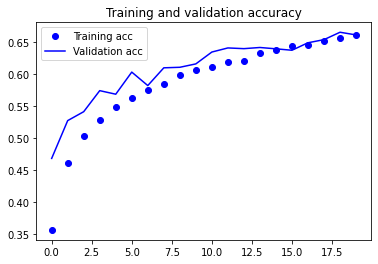

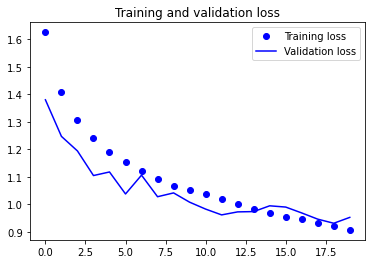

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classification sur le set Test 

In [20]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical',
        shuffle='False')

test_loss, test_acc = model.evaluate(test_generator, steps=29)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

Found 7178 images belonging to 7 classes.
29/29 [==============================] - 15s 516ms/step - loss: 0.9522 - accuracy: 0.6616
Accuracy score du jeu de données test : 66.16%


## Visualisation de la matrice de confusion

In [21]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

29/29 [==============================] - 19s 656ms/step


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

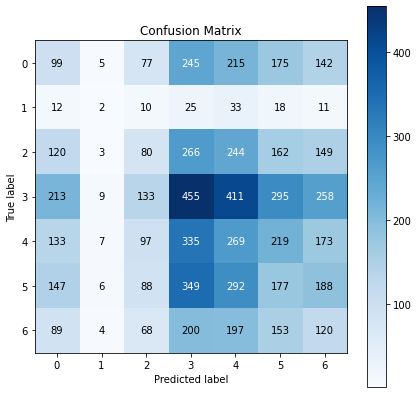

In [22]:
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred_classes, figsize=(7,7))

## Test du réseau sur des images qui n'existent pas dans la base test

In [ ]:
model = load_model('facial-expression-recognition_3_v3.h5')

In [ ]:
from zipfile import ZipFile

test_file_name = "/content/FER_test_perso.zip"

with ZipFile(test_file_name, 'r') as zip:
    zip.printdir()
    zip.extractall('FER_test_perso')

In [ ]:
test_perso_dir = '/content/FER_test_perso/FER_test_perso'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator_perso = test_datagen.flow_from_directory(
        test_perso_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 9 images belonging to 7 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator_perso, steps=9)
print('Accuracy score du jeu de données test : {:.2f}%'.format(test_acc*100))

9/9 [==============================] - 0s 20ms/step - loss: 4.6020 - accuracy: 0.6667
Accuracy score du jeu de données test : 66.67%


<ipython-input-124-af114739ec8b>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator_perso)


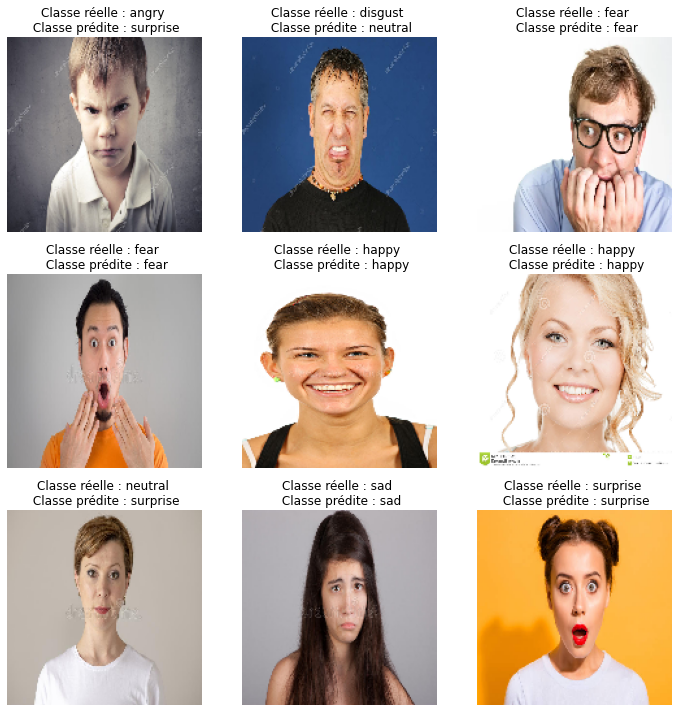

In [ ]:
# Etiquettes de classe réelles
y_true = test_generator_perso.classes

# Prédictions sur les données de test
y_pred = model.predict_generator(test_generator_perso)
y_pred_classes = np.argmax(y_pred, axis=1)

# Noms de classe -
class_names = list(test_generator_perso.class_indices.keys())

# Afficher les résultats avec les images 
num_images = len(y_true)
num_cols = 3  # Nombre de colonnes d'images
num_rows = num_images // num_cols + (num_images % num_cols > 0)  # Nombre de lignes d'images

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_images):
    # Calculer l'indice de ligne et de colonne de cette image
    row = i // num_cols
    col = i % num_cols
    # Charger l'image à partir du générateur
    img, _ = test_generator_perso[i]
    true_class = class_names[y_true[i]]
    pred_class = class_names[y_pred_classes[i]]
    # Afficher l'image avec les étiquettes de classe 
    axs[row, col].imshow(img[0])
    axs[row, col].set_title(f"Classe réelle : {true_class} \n Classe prédite : {pred_class}")
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()